Inspect the effect of parameters on the MEG response.

In [2]:
from collections import namedtuple, OrderedDict
import os
import glob

import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from nengo_learn_assoc_mem.utils import numpy_bytes_to_str
from nengo_learn_assoc_mem.paths import data_path

In [27]:
intercept_vals = (0.1, 0.2, 0.3)
lr_vals = (1e-5, 5e-6, 1e-6, 1e-7)
repeat_vals = (4, 5, 6)

# Effect of intercepts

In [47]:
n_repeats = 5
lr = 5e-6
intercept = 0.2

In [48]:
tmp_df_list = []

for intercept in intercept_vals:
    read_path = os.path.join(data_path, f"neg_voja_enc_{n_repeats}_{intercept}_{lr}.h5")
    tmp_df_list.append(pd.read_hdf(read_path, "response").assign(intercept=intercept))
    
    with h5py.File(read_path) as fi:
        t_sim = list(fi["t_range"])
        print(t_sim)

act_df = pd.concat(tmp_df_list)

[0.0, 64.099999999999994]
[0.0, 64.099999999999994]
[0.0, 64.099999999999994]


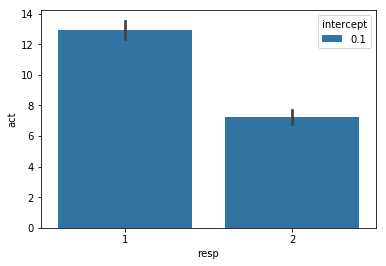

In [52]:
plt_df = act_df[(act_df.targ == True)  & (act_df.intercept == 0.1)]
sns.barplot(x="resp", y="act", hue="intercept", data=plt_df)

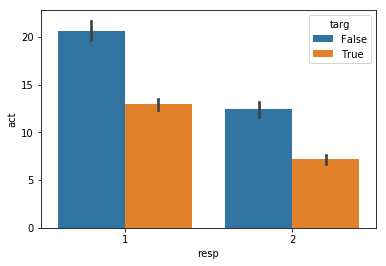

In [66]:
#plt_df = act_df[(act_df.targ == True) & (act_df.intercept == 0.1)]
plt_df = act_df[act_df.intercept == 0.1]
sns.barplot(x="resp", y="act", hue="targ", data=plt_df)

In [21]:
with h5py.File(base_case_path) as fi:
    print(list(fi.keys()))

['encoders', 'fan1', 'fan2', 'foil1', 'foil2', 't_range', 'vocab_strings', 'vocab_vectors']


# Effect of Learning Rate

In [53]:
n_repeats = 4
intercept = 0.3

In [54]:
tmp_df_list = []

for lr in lr_vals:
    read_path = os.path.join(data_path, f"neg_voja_enc_{n_repeats}_{intercept}_{lr}.h5")
    tmp_df_list.append(pd.read_hdf(read_path, "response").assign(lr=lr))

act_df = pd.concat(tmp_df_list)

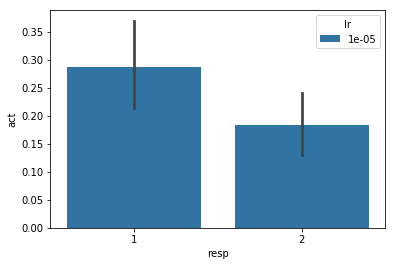

In [58]:
plt_df = act_df[(act_df.targ == True) & (act_df.lr == 1e-5)]
sns.barplot(x="resp", y="act", hue="lr", data=plt_df)

# Effect of Repetition

In [71]:
intercept = 0.2
lr = 5e-6

In [72]:
tmp_df_list = []
e_hist = []

for n_repeats in repeat_vals:
    read_path = os.path.join(data_path, f"neg_voja_enc_{n_repeats}_{intercept}_{lr}.h5")
    tmp_df_list.append(pd.read_hdf(read_path, "response").assign(repeats=n_repeats))
    
    with h5py.File(read_path) as fi:
        e_hist.append(np.array(fi["encoders"]))
        

act_df = pd.concat(tmp_df_list)

## Compare deviation from origin

In [73]:
for enc in e_hist:
    print(np.linalg.norm((enc[0] - enc[-1]), axis=1).sum())

78.0103723351
77.9668264383
77.9569918103


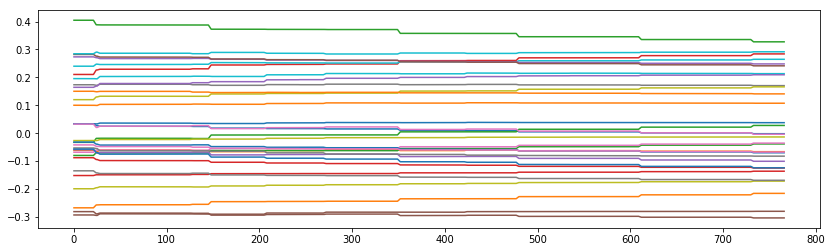

In [74]:
plt.figure(figsize=(14, 4))
plt.plot(e_hist[-1][:, 0, :]);

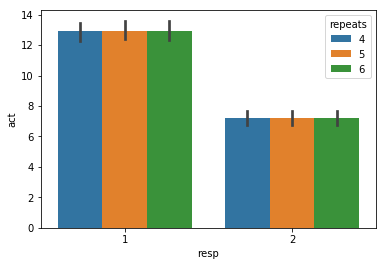

In [102]:
plt_df = act_df[(act_df.targ == True)]# & (act_df.lr == 1e-6)]
sns.barplot(x="resp", y="act", hue="repeats", data=plt_df)